<a href="https://colab.research.google.com/github/Sparkozzy/Magic_ML/blob/main/Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# metadata
print(magic_gamma_telescope.metadata)

# variable information
print(magic_gamma_telescope.variables)



{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [4]:
df=pd.DataFrame(X)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [5]:
df['class']=y
df['class'].unique()

array(['g', 'h'], dtype=object)

In [6]:
df["class"]=(df["class"]=='g').astype(int)

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


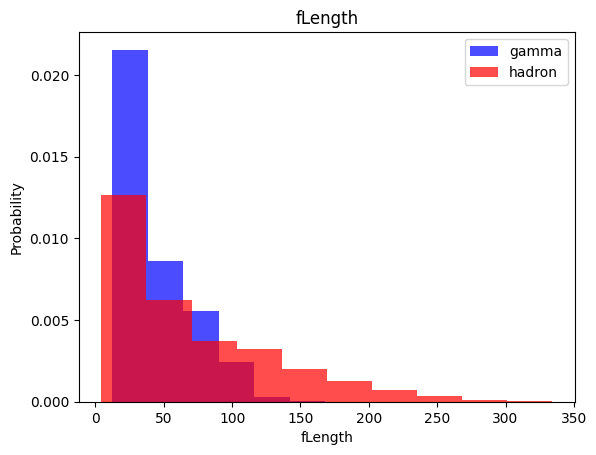

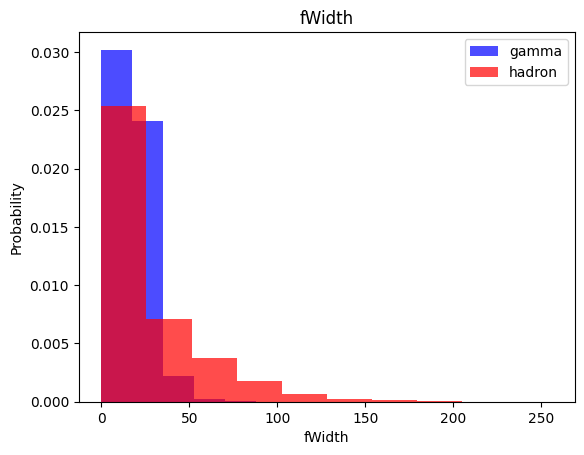

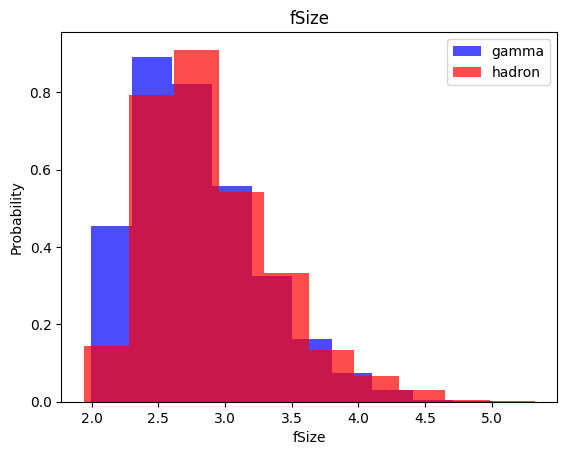

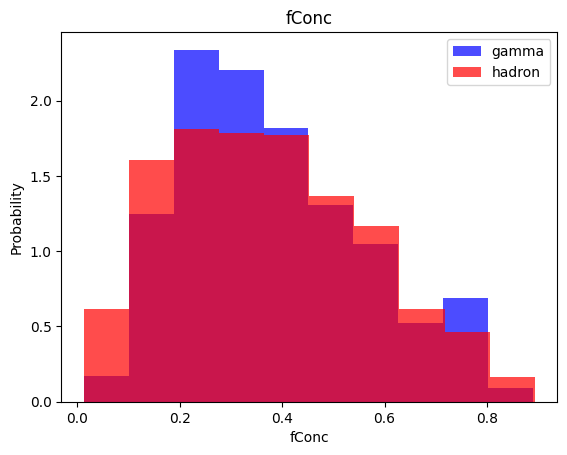

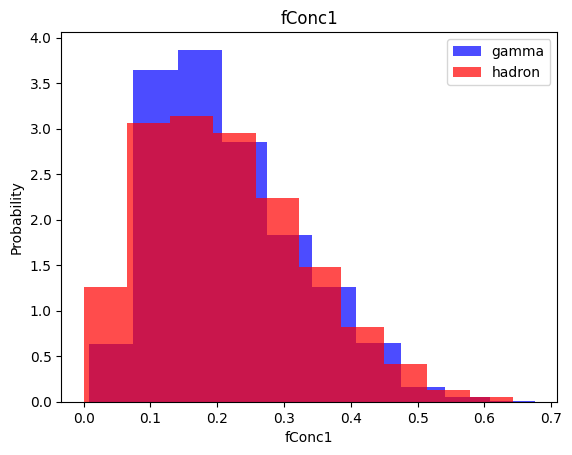

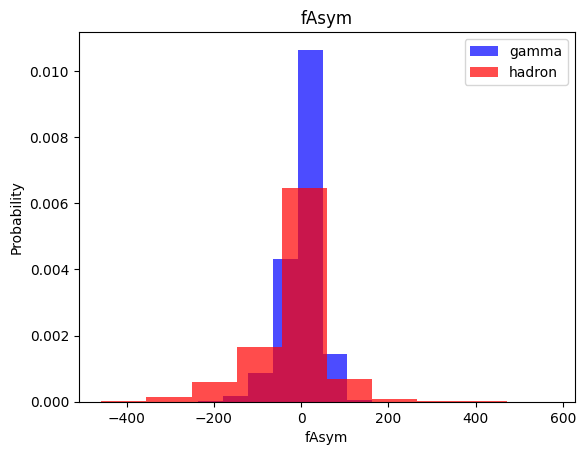

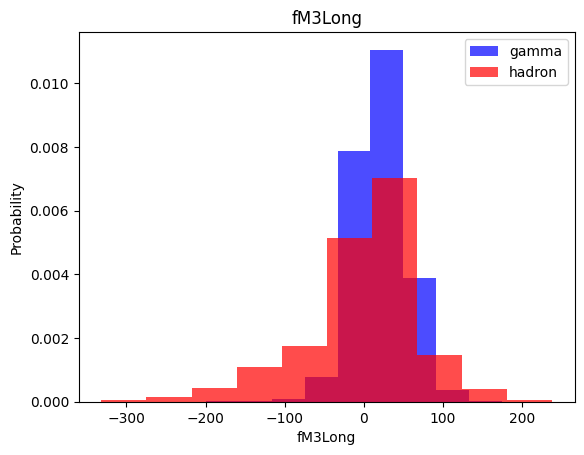

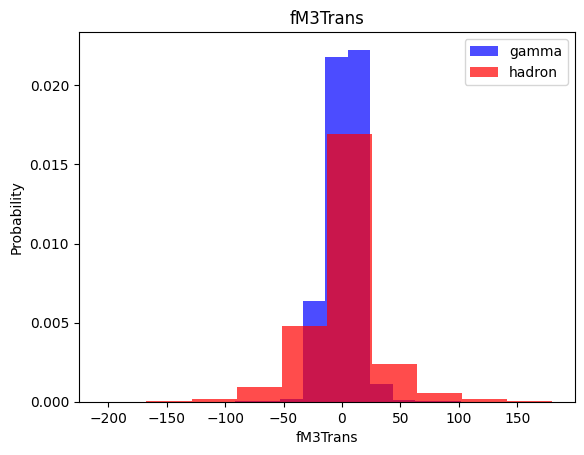

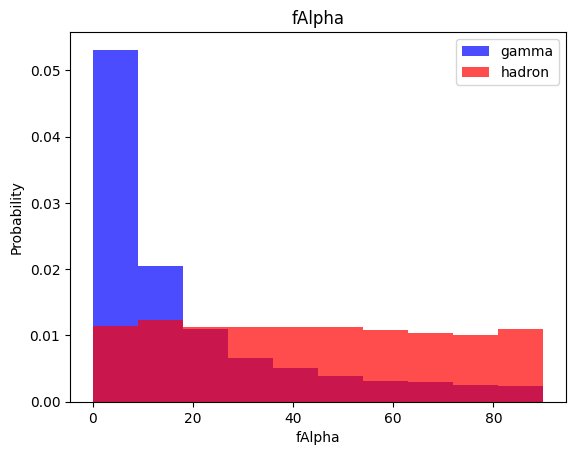

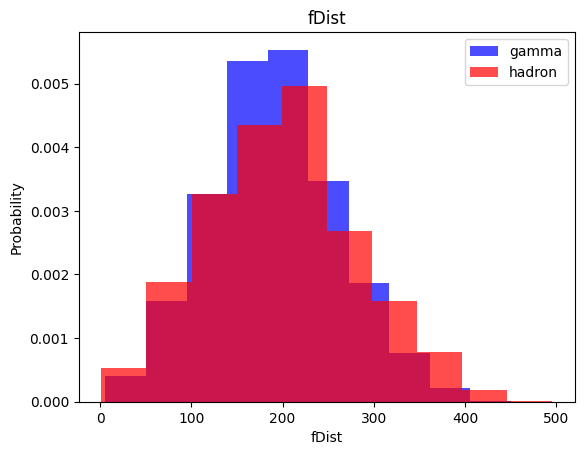

In [8]:
for label in df.columns[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(df, oversample=False):
  X=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X, np.reshape(y, (-1,1))))
  return data

In [11]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
13326,21.5981,12.3629,2.3620,0.7889,0.4711,26.2923,20.1564,-13.4053,7.3532,89.6861,0
1457,27.2296,17.5805,2.7585,0.3714,0.2014,13.7829,21.6176,10.4868,2.0627,116.7760,1
15823,154.8110,29.1360,3.2806,0.2358,0.1208,40.2521,158.9880,27.4137,0.6970,147.7610,0
3080,32.3481,22.0511,2.9009,0.2663,0.1614,8.5913,27.8886,-3.6209,5.8510,187.6530,1
9144,30.3343,20.6495,2.6739,0.2860,0.1600,32.8752,-16.7559,10.3996,9.1290,112.4600,1
...,...,...,...,...,...,...,...,...,...,...,...
12378,22.2809,10.2002,2.4688,0.5317,0.3049,19.8247,22.9996,-5.5027,22.4196,79.0676,0
4573,24.7323,10.4829,2.3664,0.5290,0.3118,13.7086,19.5750,6.9912,14.7714,192.0340,1
17148,23.3398,6.8631,2.2401,0.7755,0.3955,15.5493,3.1633,-10.5454,23.0812,201.1968,0
3809,92.5734,31.9545,3.0533,0.2468,0.1659,-33.2248,70.0167,28.3546,11.1270,332.8540,1


In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train[train.columns[:-1]], train[train.columns[-1]])

In [13]:
# Modified code for ipython-input-35-51df2ea4bb13
# Original:
# train, x_train, y_train = scale_dataset(train, oversample=True)
# valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
# test, x_test, y_test = scale_dataset(test, oversample=False)


# Updated code:
train_data = scale_dataset(train, oversample=True)
valid_data = scale_dataset(valid, oversample=False)
test_data = scale_dataset(test, oversample=False)

# Extracting X and y from the returned data
x_train = train_data[:, :-1]  # Select all columns except the last one
y_train = train_data[:, -1]   # Select only the last column
x_valid = valid_data[:, :-1]
y_valid = valid_data[:, -1]
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn_model.predict(x_test)
y_pred

array([1., 1., 0., ..., 0., 1., 1.])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      1315
         1.0       0.83      0.88      0.86      2489

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)

In [18]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.41      0.51      1315
         1.0       0.74      0.90      0.81      2489

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [19]:
from sklearn.linear_model import LogisticRegression

lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [20]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      1315
         1.0       0.85      0.83      0.84      2489

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



In [21]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(x_train, y_train)

In [22]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1315
         1.0       0.89      0.89      0.89      2489

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [23]:
def plot_history(history):
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()



In [37]:
import tensorflow as tf

def train_model(x_train, y_train, num_node,lr, batch_size, epochs):
  inputs = tf.keras.Input(shape=(10,))
  nn_model= tf.keras.Sequential([
      inputs,
      tf.keras.layers.Dense(num_node, activation='relu',),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_node, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history=nn_model.fit(x_train, y_train, batch_size=batch_size,verbose=0, epochs=epochs, validation_split=0.2)
  return nn_model, history

num_node=32
dropout_prob=0.2
lr=0.001
batch_size=32
epochs=10

nn_model, history=train_model(x_train, y_train, num_node, lr, batch_size, epochs)

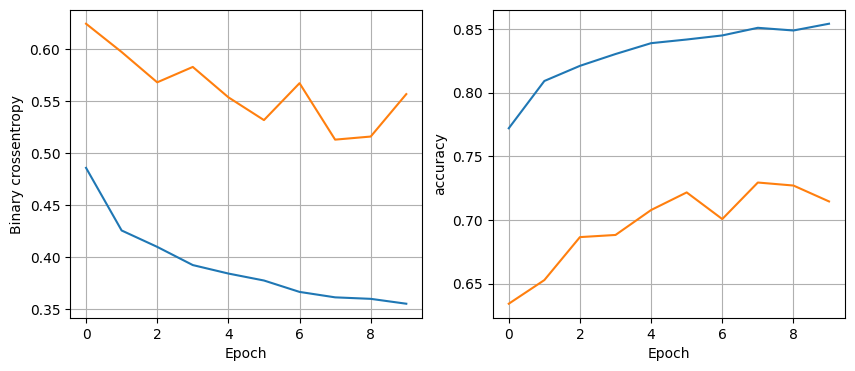

In [38]:
plot_history(history)

Treinando com num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 32


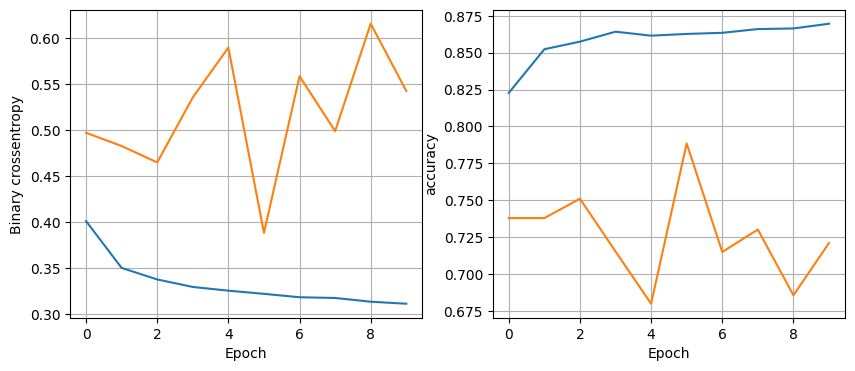

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8768 - loss: 0.3001
Val_loss: 0.30434650182724 para num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 64


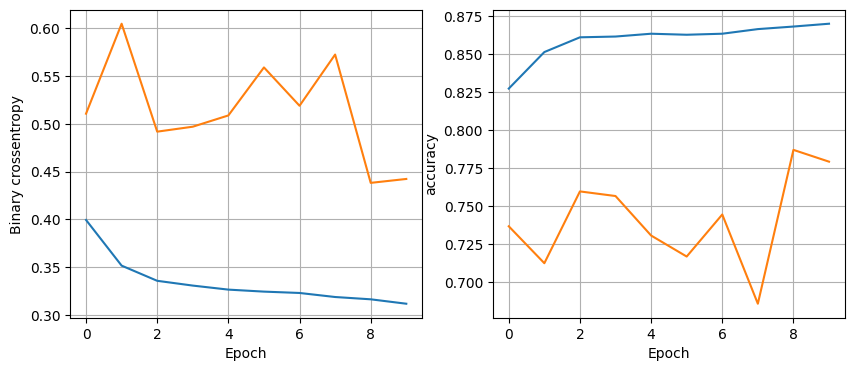

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8725 - loss: 0.3031
Val_loss: 0.3031340539455414 para num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 128


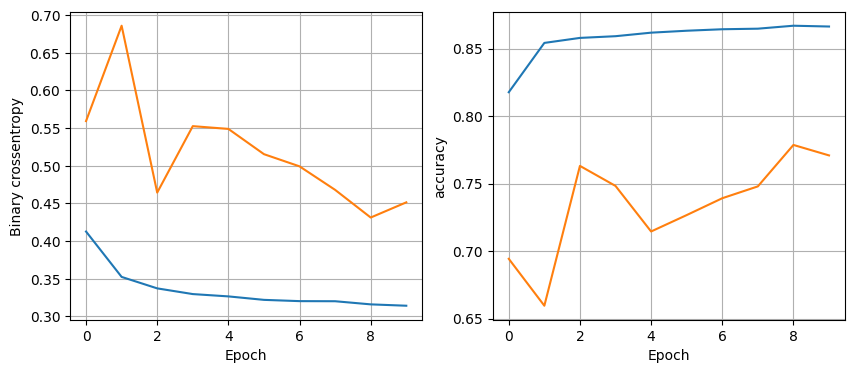

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8769 - loss: 0.2954
Val_loss: 0.3039873242378235 para num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 32


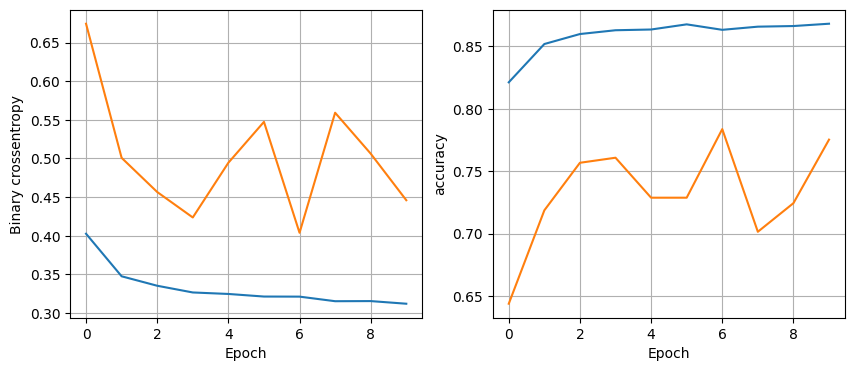

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8729 - loss: 0.2993
Val_loss: 0.30579444766044617 para num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 64


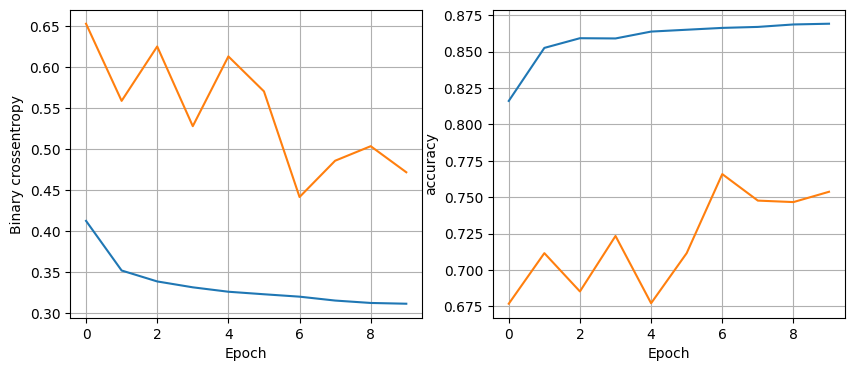

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.3079
Val_loss: 0.312140554189682 para num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 128


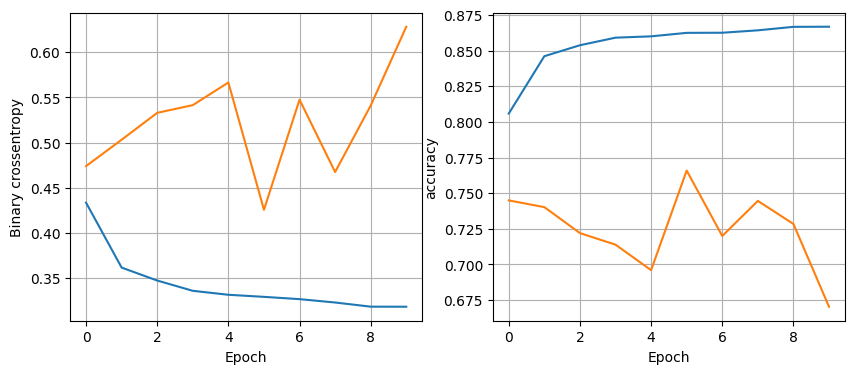

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.3113
Val_loss: 0.3148137927055359 para num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 32


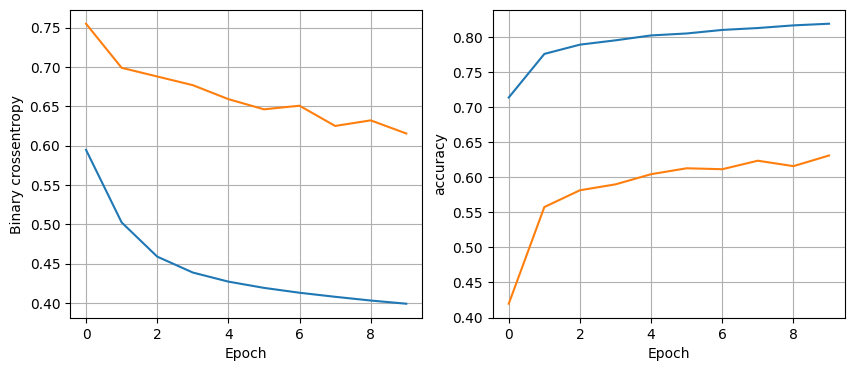

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.3885
Val_loss: 0.3797709047794342 para num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 64


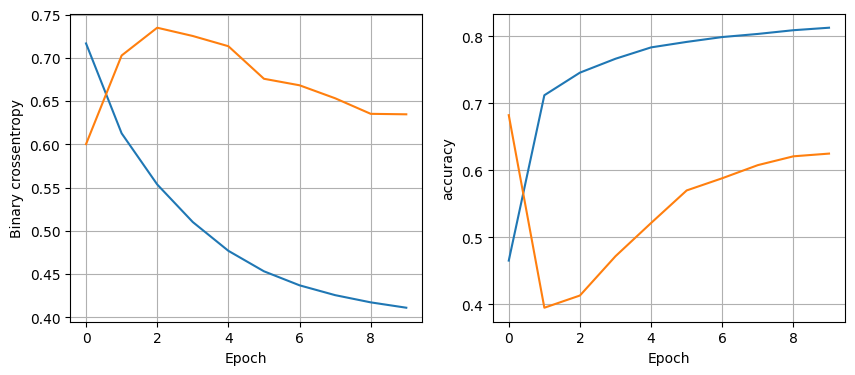

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8191 - loss: 0.3934
Val_loss: 0.3880850672721863 para num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 128


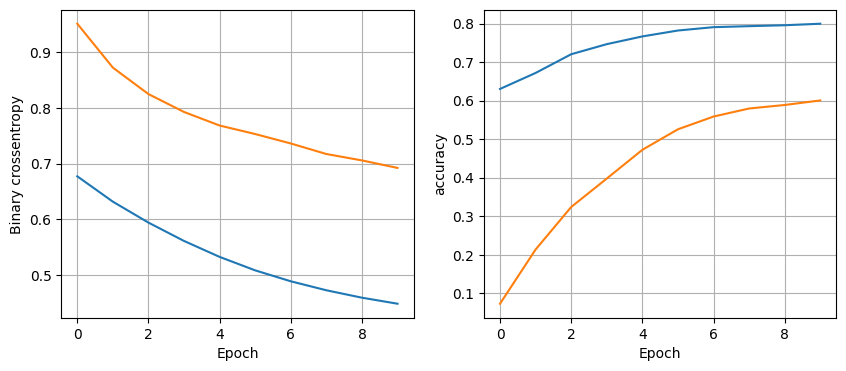

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4355
Val_loss: 0.42954525351524353 para num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 32


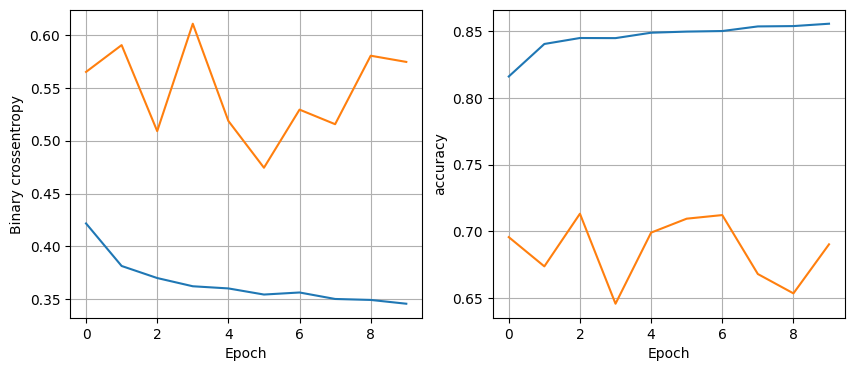

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.3120
Val_loss: 0.3136416971683502 para num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 64


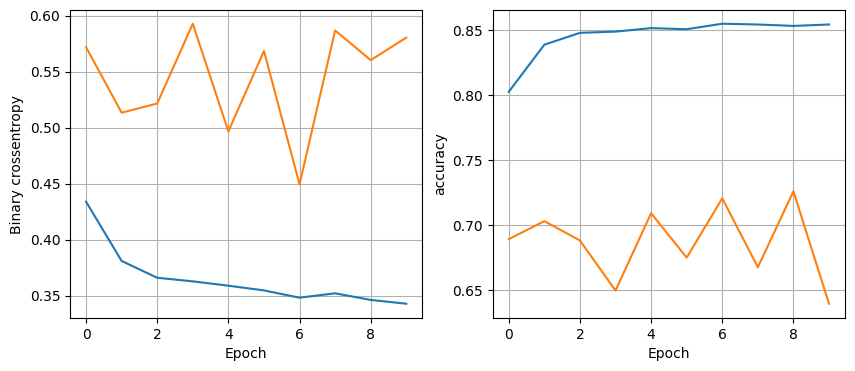

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.3170
Val_loss: 0.3188953101634979 para num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 128


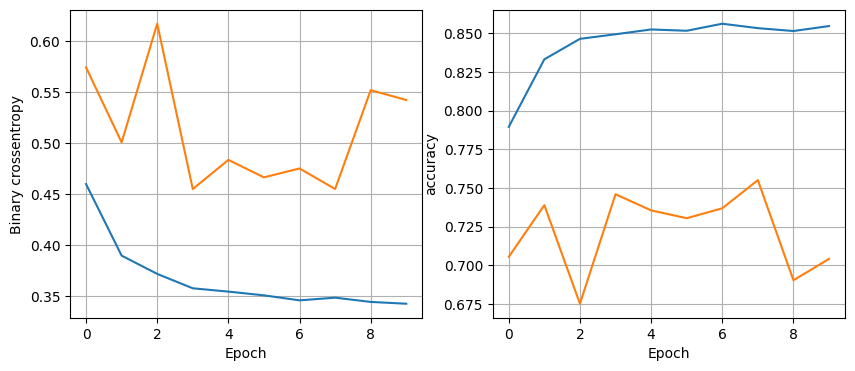

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3035
Val_loss: 0.3077324330806732 para num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 32


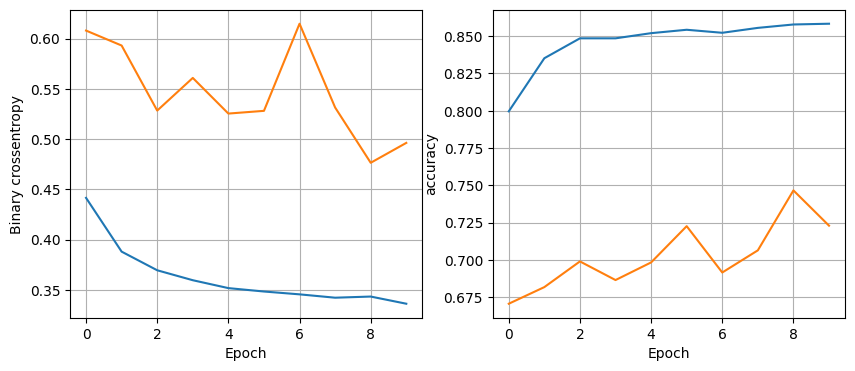

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3096
Val_loss: 0.3129059374332428 para num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 64


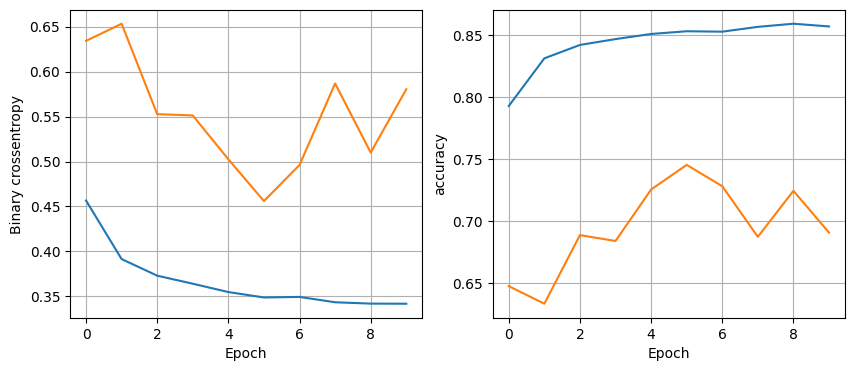

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.3101
Val_loss: 0.3092591166496277 para num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 128


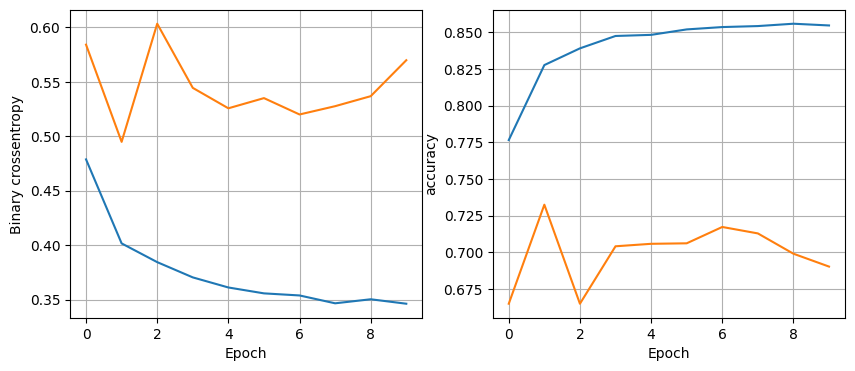

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3144
Val_loss: 0.31204965710639954 para num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 32


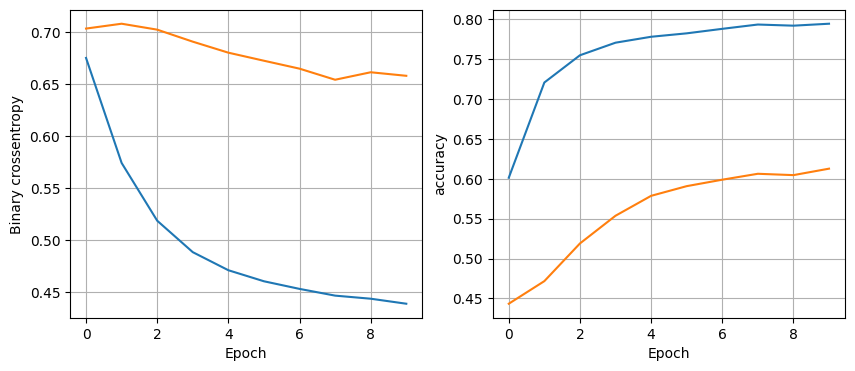

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8163 - loss: 0.4005
Val_loss: 0.39323917031288147 para num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 64


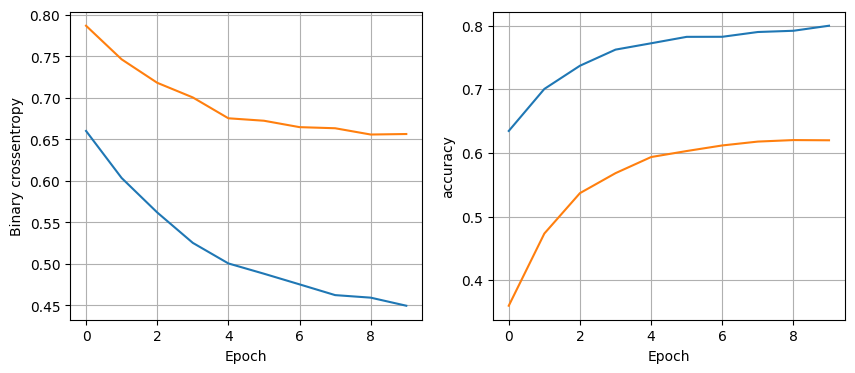

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8138 - loss: 0.4113
Val_loss: 0.4032600224018097 para num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


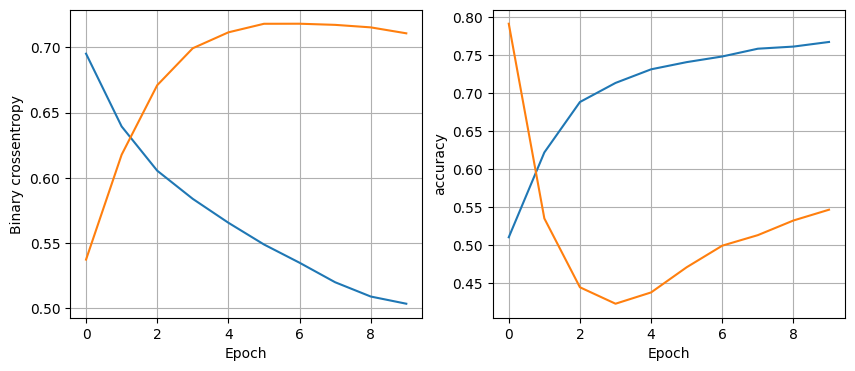

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7880 - loss: 0.4634
Val_loss: 0.4569965600967407 para num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 32


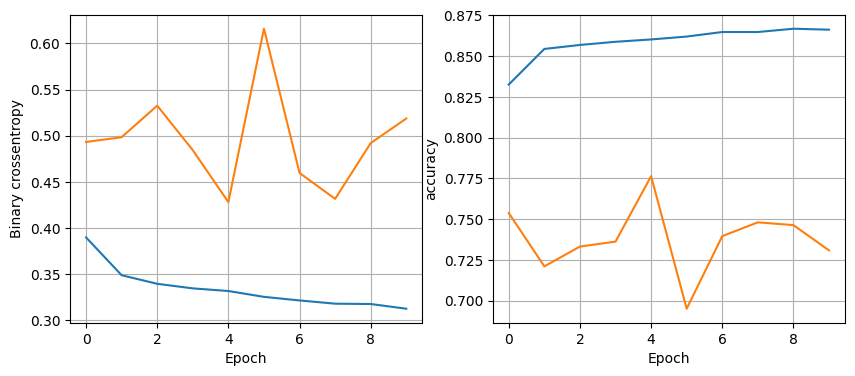

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8745 - loss: 0.3025
Val_loss: 0.3016011416912079 para num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 64


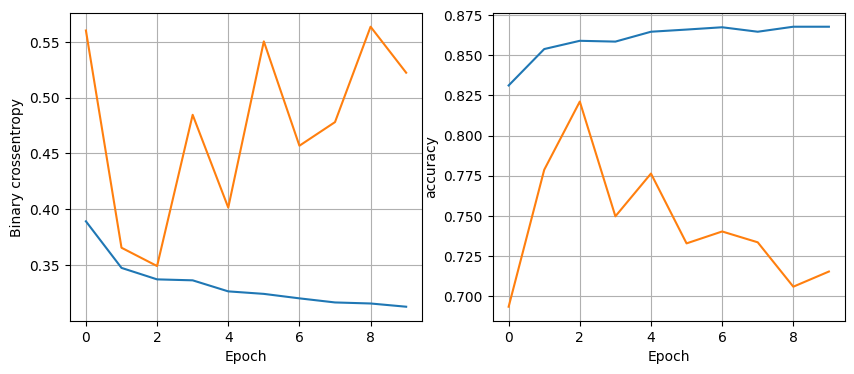

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8732 - loss: 0.3031
Val_loss: 0.3070634603500366 para num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 128


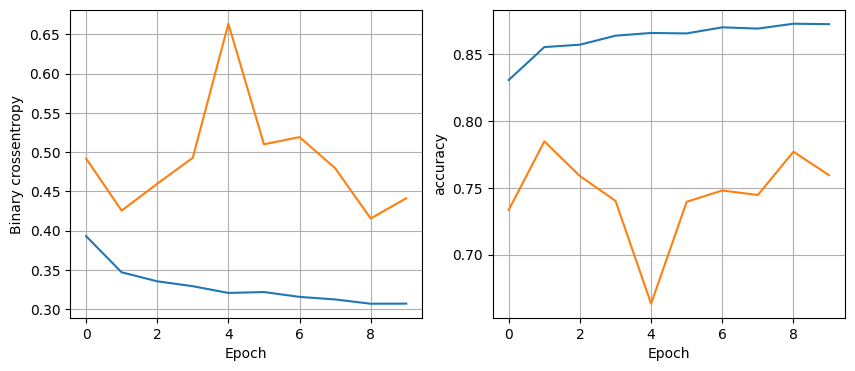

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.2966
Val_loss: 0.29922962188720703 para num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 32


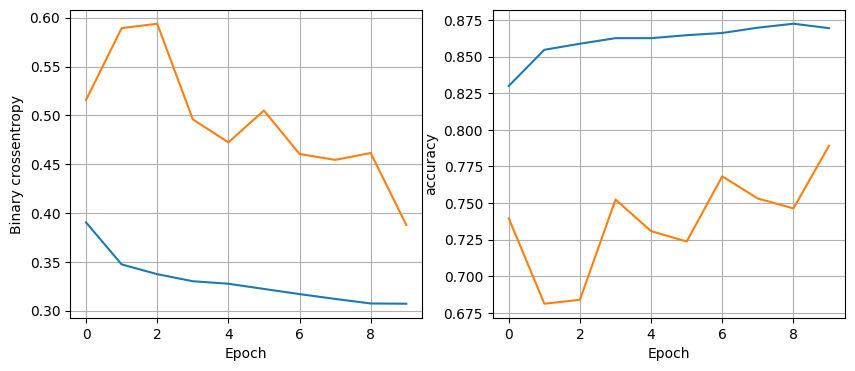

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8665 - loss: 0.3112
Val_loss: 0.31509846448898315 para num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 64


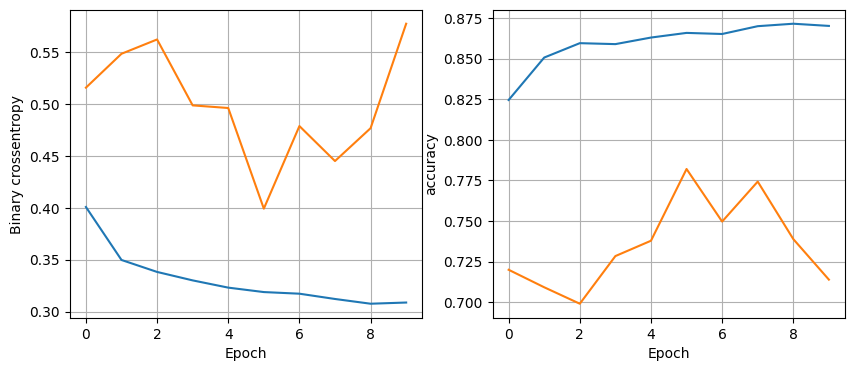

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.2991
Val_loss: 0.30230268836021423 para num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 128


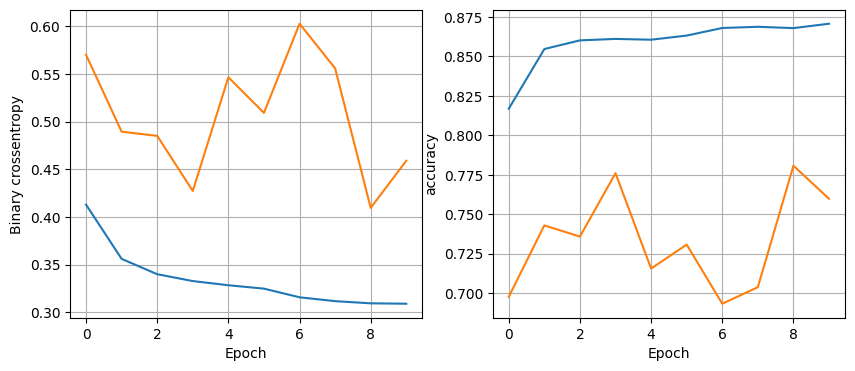

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8707 - loss: 0.2961
Val_loss: 0.30236268043518066 para num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 32


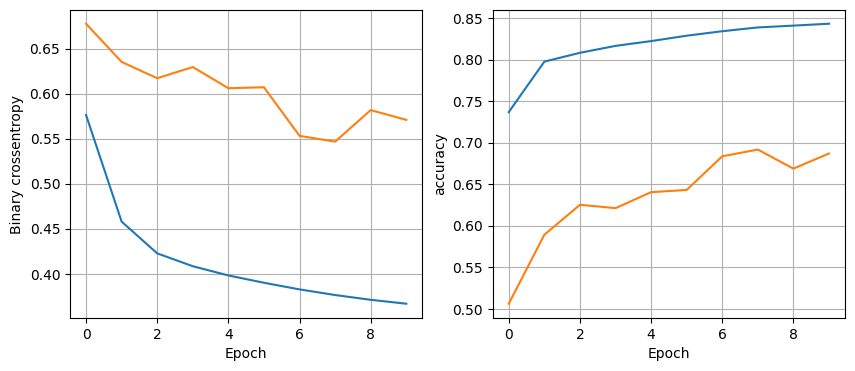

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8522 - loss: 0.3479
Val_loss: 0.3467446565628052 para num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 64


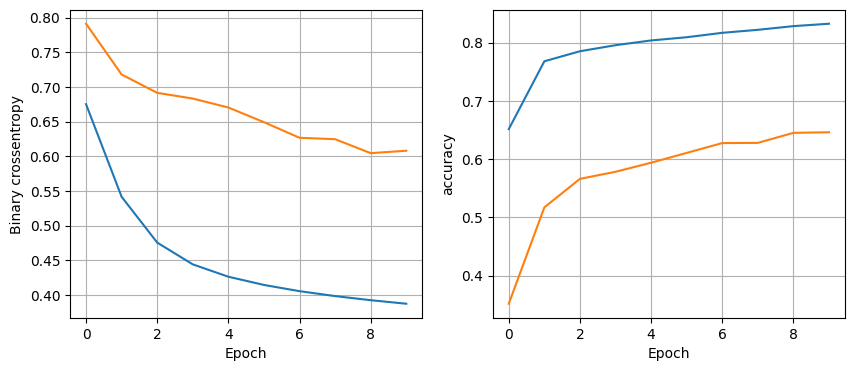

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 0.3747
Val_loss: 0.36779147386550903 para num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 128


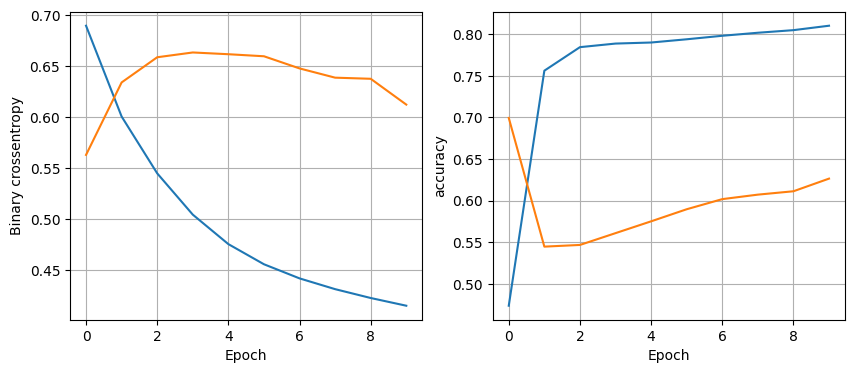

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8234 - loss: 0.3974
Val_loss: 0.3923434913158417 para num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 32


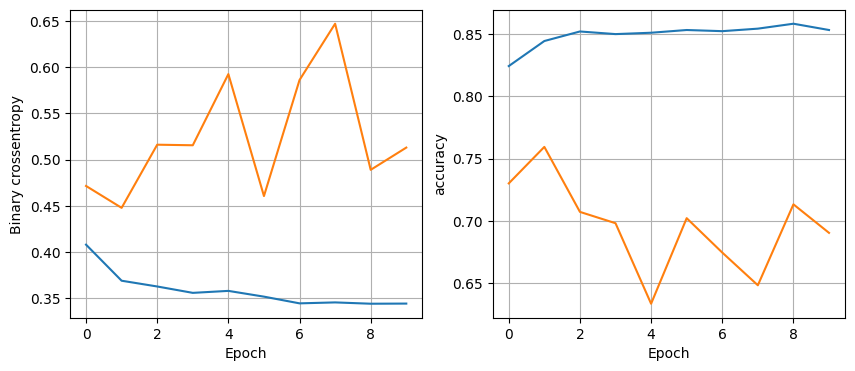

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8762 - loss: 0.3121
Val_loss: 0.31237122416496277 para num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 64


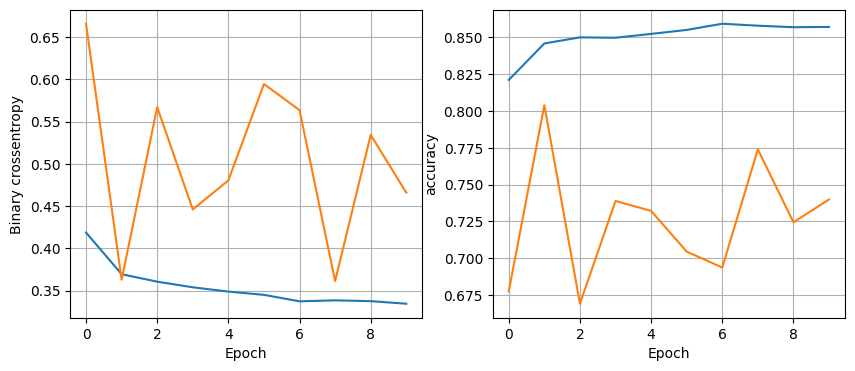

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3026
Val_loss: 0.30705270171165466 para num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 128


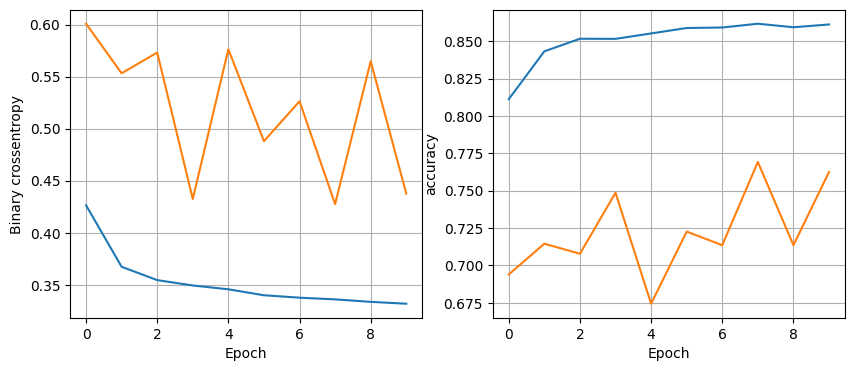

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3086
Val_loss: 0.3103561997413635 para num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 32


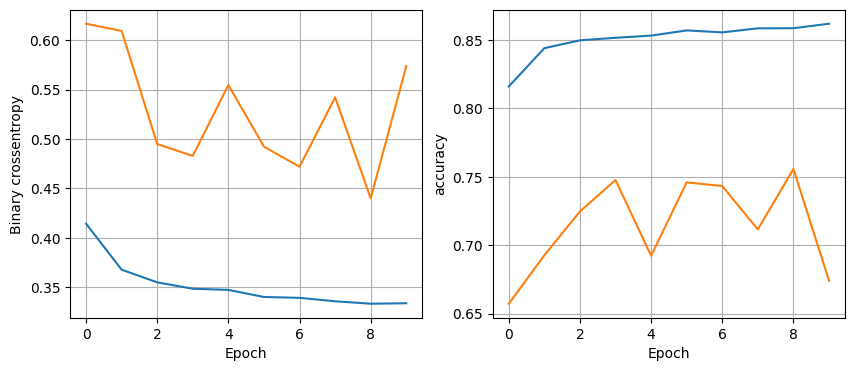

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3121
Val_loss: 0.3126646876335144 para num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 64


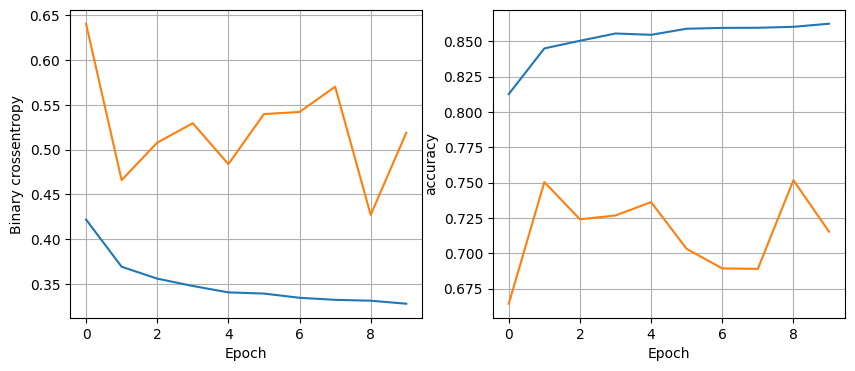

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8776 - loss: 0.3005
Val_loss: 0.3037620782852173 para num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 128


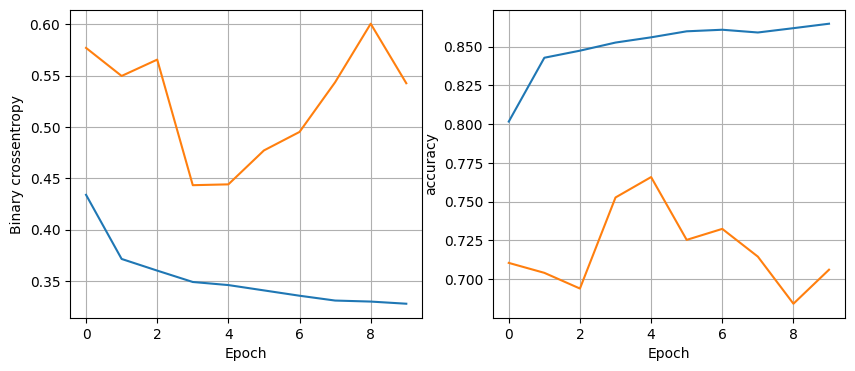

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.3040
Val_loss: 0.30399900674819946 para num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 32


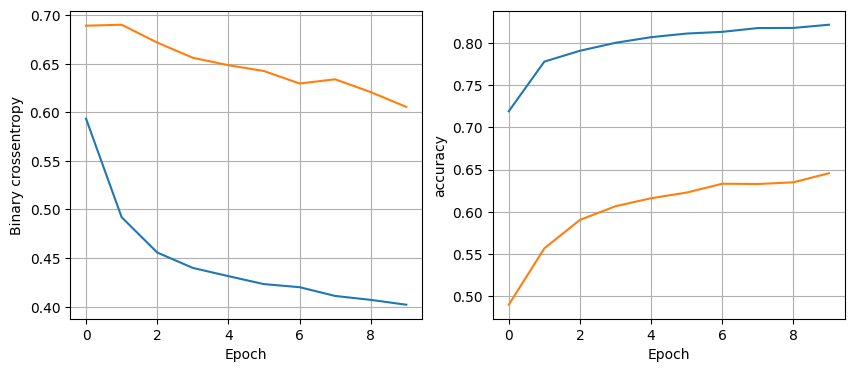

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.3665
Val_loss: 0.36005306243896484 para num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 64


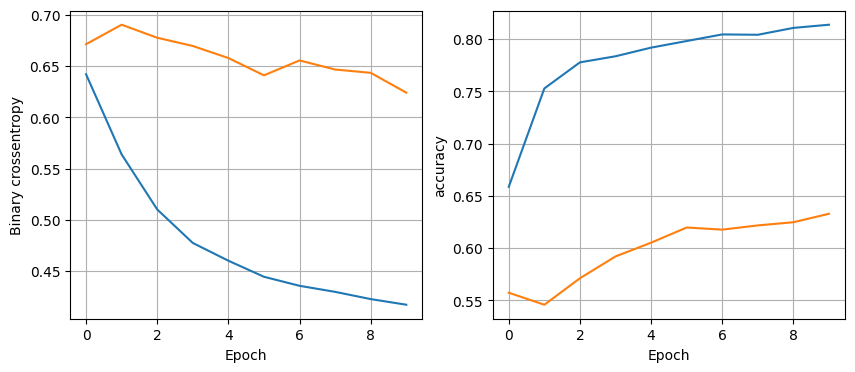

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8256 - loss: 0.3832
Val_loss: 0.3773292303085327 para num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


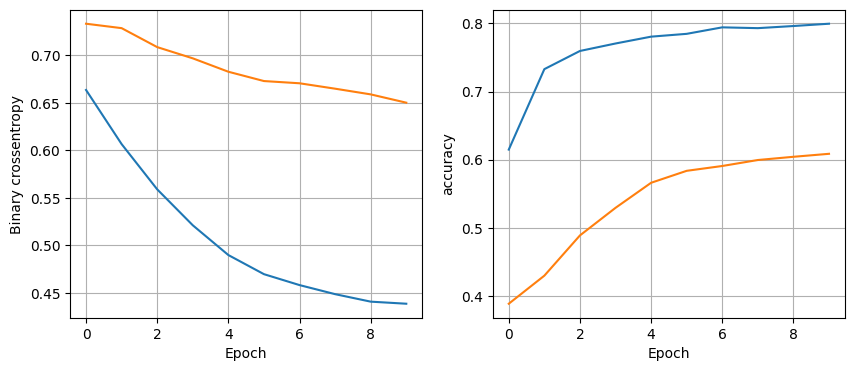

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8182 - loss: 0.4027
Val_loss: 0.3947344720363617 para num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 32


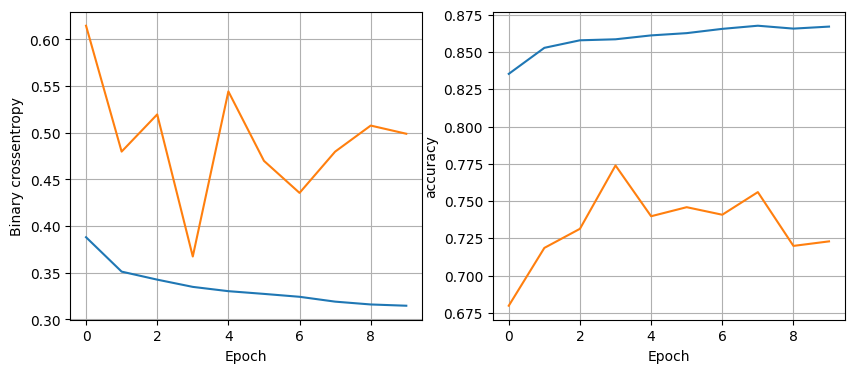

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.2982
Val_loss: 0.301741361618042 para num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 64


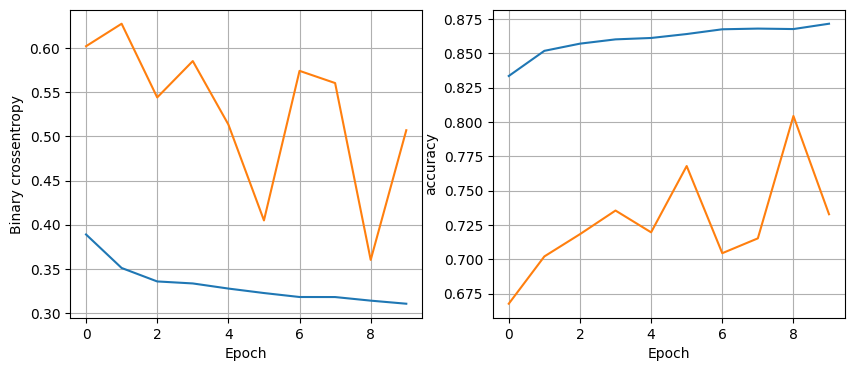

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.3016
Val_loss: 0.3078272342681885 para num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 128


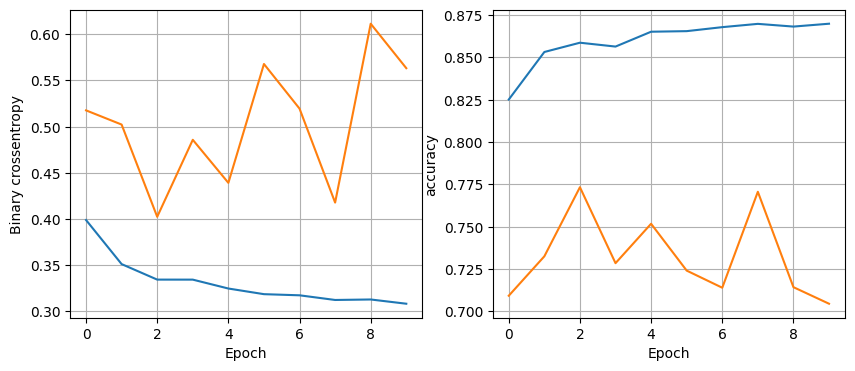

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3033
Val_loss: 0.30562546849250793 para num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 32


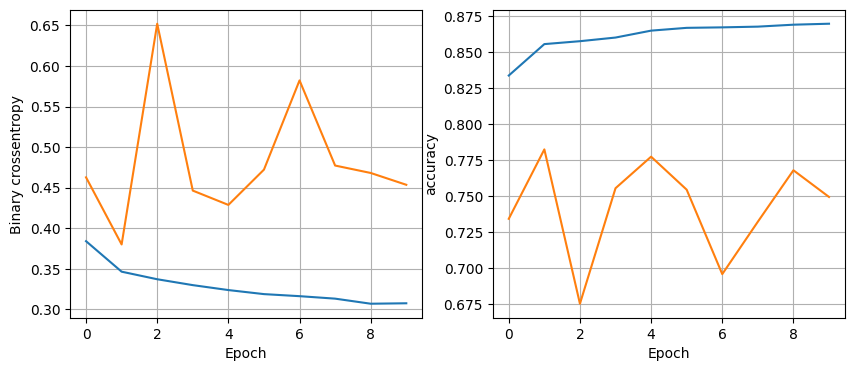

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8781 - loss: 0.2898
Val_loss: 0.2938183546066284 para num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 64


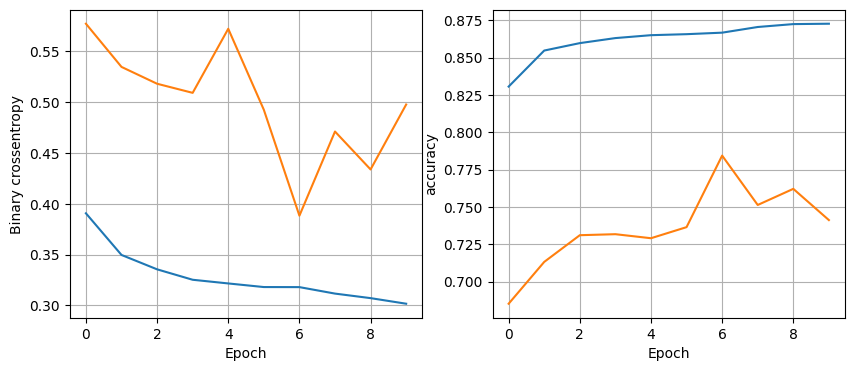

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.2917
Val_loss: 0.2987680733203888 para num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 128


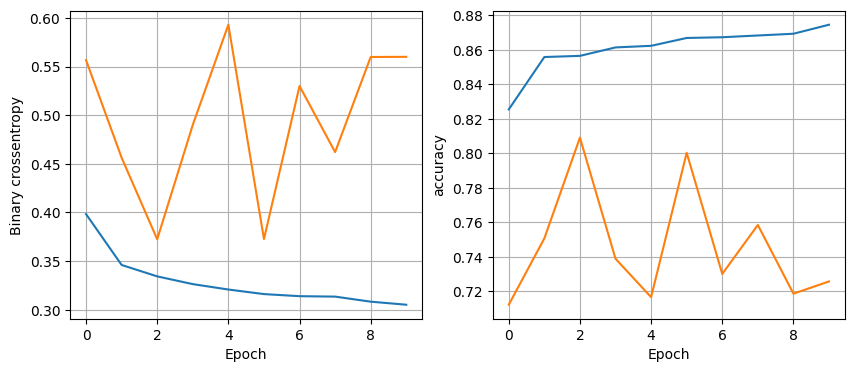

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3002
Val_loss: 0.30218738317489624 para num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 32


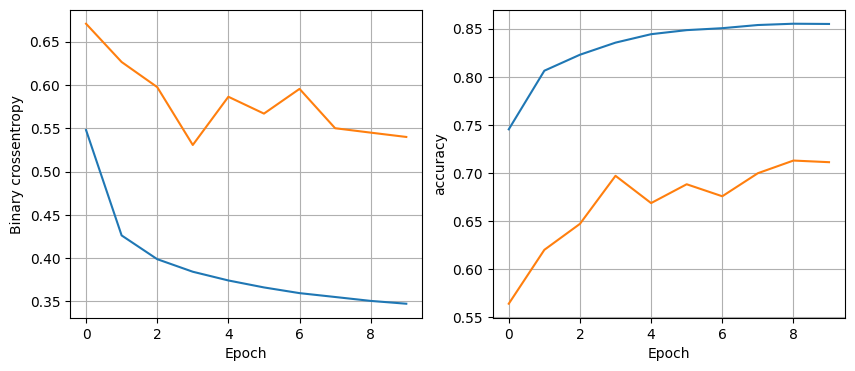

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3338
Val_loss: 0.33224958181381226 para num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 64


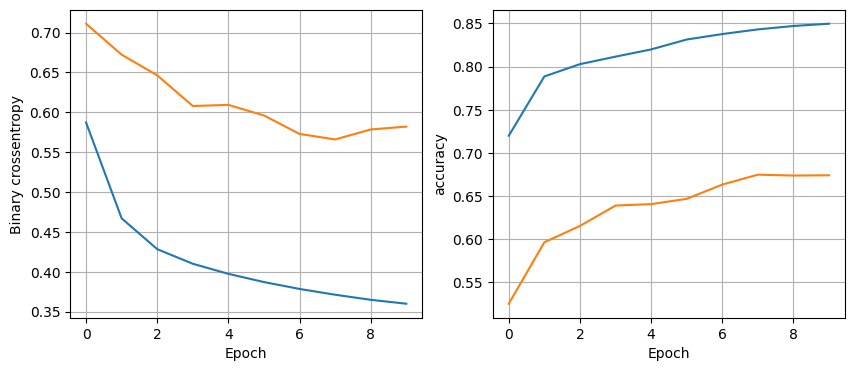

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3444
Val_loss: 0.340011328458786 para num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 128


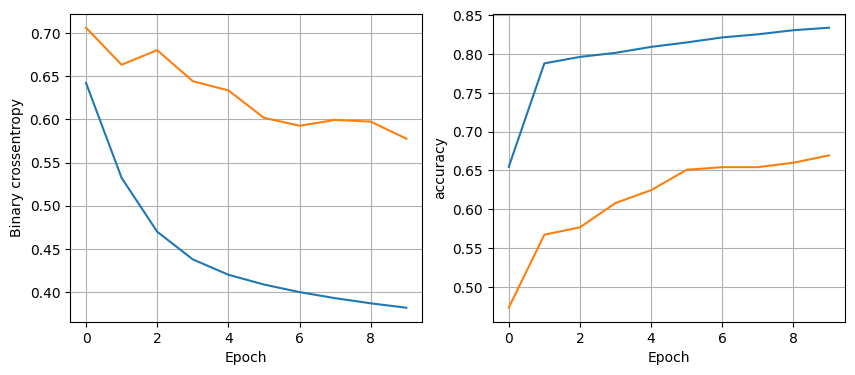

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.3649
Val_loss: 0.3612601161003113 para num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 32


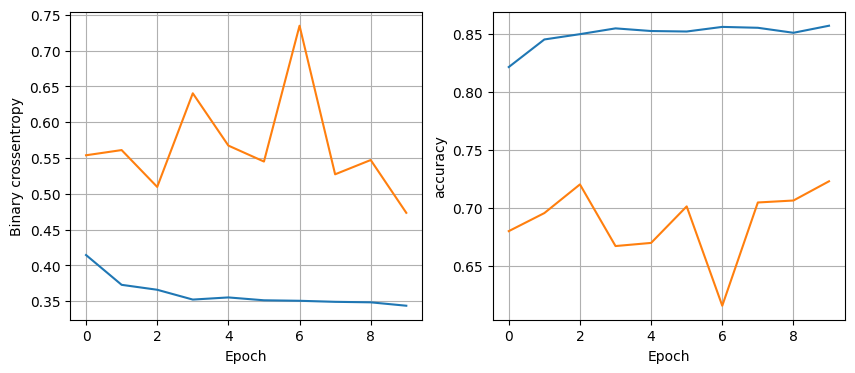

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.3071
Val_loss: 0.3077138364315033 para num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 64


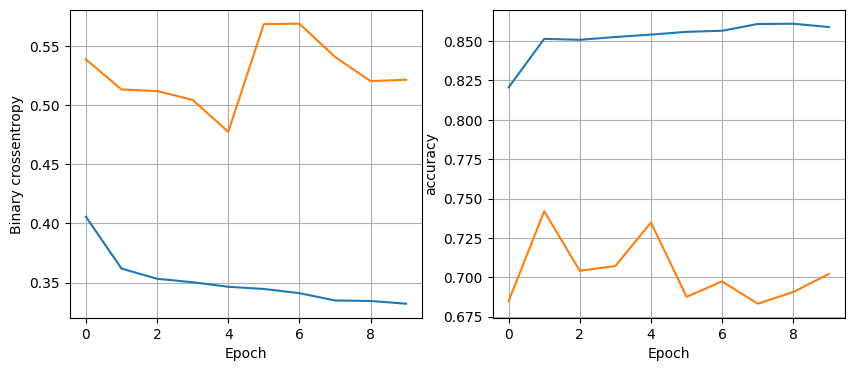

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3040
Val_loss: 0.3079267144203186 para num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 128


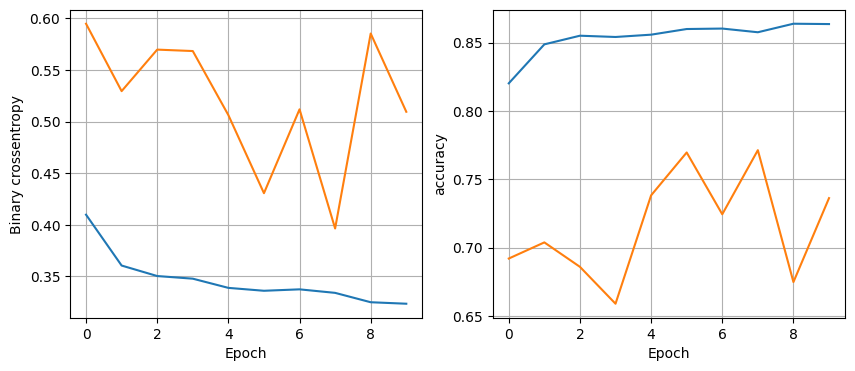

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.3130
Val_loss: 0.31132030487060547 para num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 32


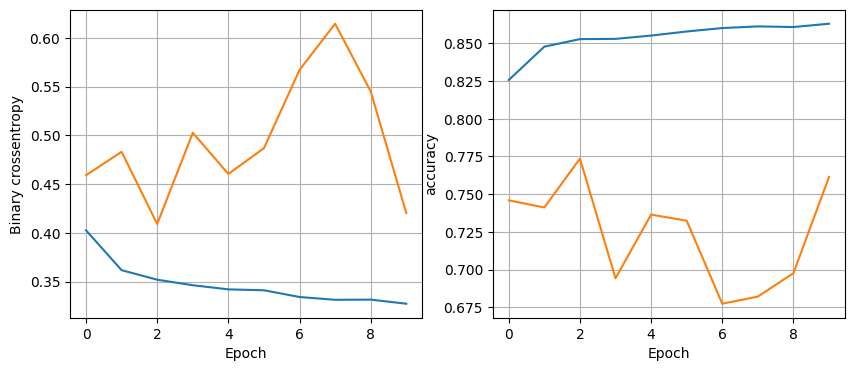

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3075
Val_loss: 0.31297749280929565 para num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 64


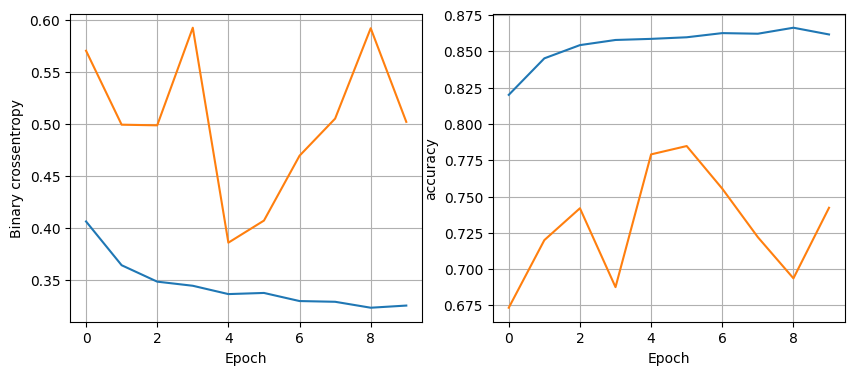

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3061
Val_loss: 0.3070918619632721 para num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 128


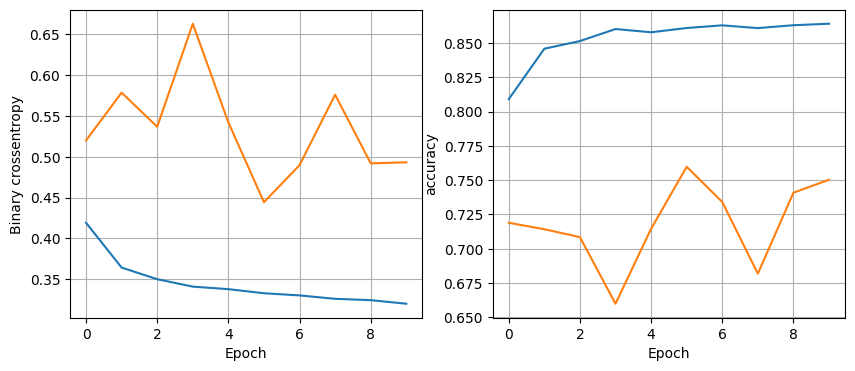

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8770 - loss: 0.2962
Val_loss: 0.29802748560905457 para num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 32


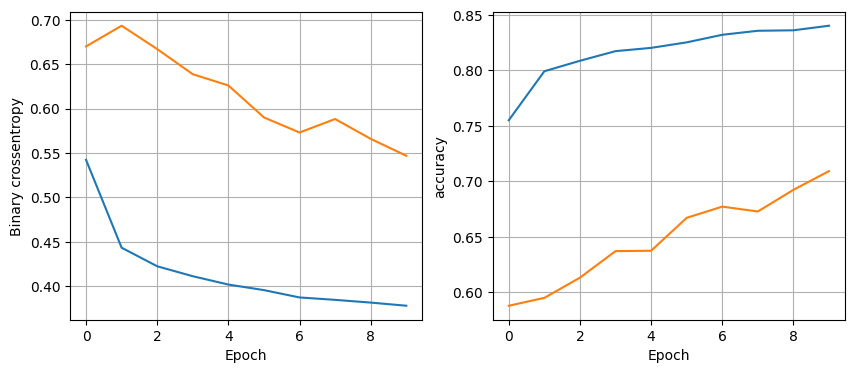

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3451
Val_loss: 0.3427848517894745 para num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 64


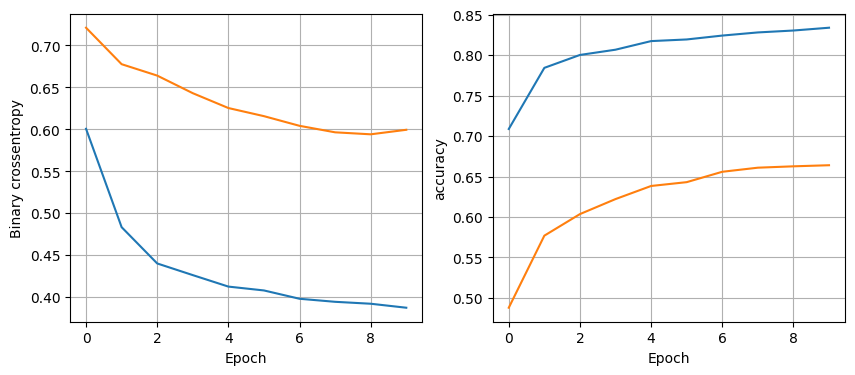

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.3551
Val_loss: 0.35075491666793823 para num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


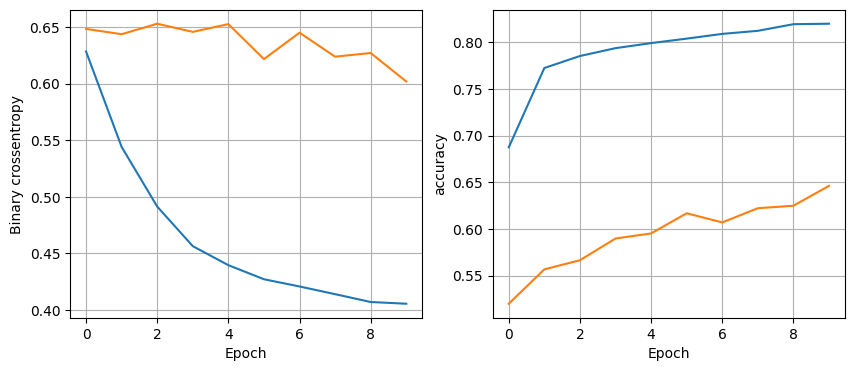

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.3721
Val_loss: 0.3665045499801636 para num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


In [40]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 10

for num_node in [32, 64, 128]:
    for dropout_prob in [0, 0.2]:
        for lr in [1e-2, 5e-3, 1e-4]:
            for batch_size in [32, 64, 128]:
                try:
                    print(f'Treinando com num_node: {num_node}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}')

                    # Treina o modelo com os hiperparâmetros atuais
                    model, history = train_model(x_train, y_train, num_node, lr, batch_size, epochs)

                    # Plota o histórico de perda e acurácia
                    plot_history(history)

                    # Avalia no conjunto de validação
                    val_loss = model.evaluate(x_valid, y_valid)

                    print(f"Val_loss: {val_loss[0]} para num_node: {num_node}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")

                    # Verifica se é o melhor modelo até agora
                    if val_loss[0] <= least_val_loss:
                        least_val_loss = val_loss[0]
                        least_loss_model = model
                        # Salva o modelo atual com menor perda de validação
                        model.save(f"best_model_{num_node}_{dropout_prob}_{lr}_{batch_size}.keras")

                except Exception as e:
                    print(f"Erro na combinação {num_node}, {dropout_prob}, {lr}, {batch_size}: {e}")
                    continue


In [41]:
if least_loss_model is not None:
  print(f'Least validation loss: {least_val_loss}')
else:
  print('something went wrong')

Least validation loss: 0.2938183546066284


In [45]:
y_pred=least_loss_model.predict(x_test)
y_pred= (y_pred> 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80      1315
         1.0       0.88      0.93      0.90      2489

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



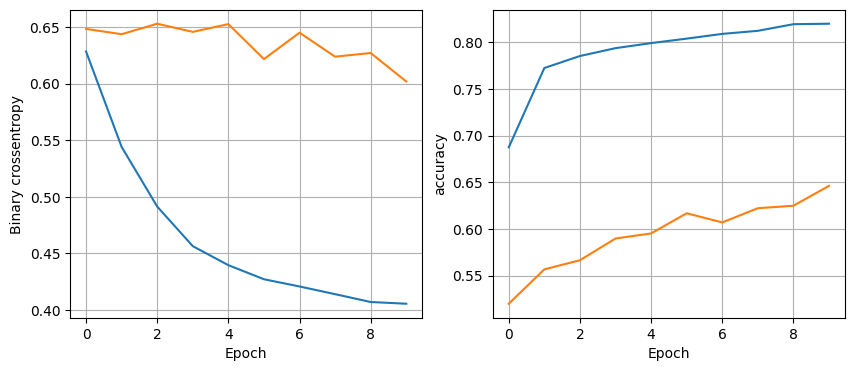

Val_loss: 0.3665045499801636 para num_node: 128,dropout_prob: 0.2, lr: 0.0001, batch_size: 128


In [52]:
if least_val_loss == 0.2938183546066284:
  plot_history(history)
  print(f"Val_loss: {val_loss[0]} para num_node: {num_node},dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
